In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [133]:
datas = []

In [134]:
test_name = '5_epochs_FL'#'descentralized_all_w_local_training_wo_global_data'
loss = 'mse'
model = 'All'
model_type = 'CNN'

file = f'/home/gabrieltalasso/IoT_Anomaly_Detection/logs/SKAB/{model_type}/{test_name}/evaluate_before_train/loss_{loss}_{model}.csv'
names = ['cid', 'round', 'loss','diff', 'anomaly', 'anomaly2']

data = pd.read_csv(file,
                    names = names)
data['client_anom'] = 'Yes'
    
datas.append(data)

In [135]:
test_name = 'anomaly2_FL_5epochs'#'descentralized_all_w_local_training_wo_global_data'
loss = 'mse'
model = 'All'
model_type = 'CNN'

anom_clients = [0,1,2,3,4]

file = f'/home/gabrieltalasso/IoT_Anomaly_Detection/logs/synthetic/{model_type}/{test_name}/evaluate_before_train/loss_{loss}_{model}.csv'
names = ['cid', 'round', 'loss','diff', 'anomaly', 'anomaly2', 'anomaly3']

data = pd.read_csv(file,
                names = names)

data['client_anom'] = data['cid'].apply(lambda x: 'Yes' if x in anom_clients else 'No')
datas.append(data)

In [136]:
test_name = 'anomaly5_FL_5epochs'#'descentralized_all_w_local_training_wo_global_data'
loss = 'mse'
model = 'All'
model_type = 'CNN'

anom_clients = [0,1,2,3,4]

file = f'/home/gabrieltalasso/IoT_Anomaly_Detection/logs/synthetic/{model_type}/{test_name}/evaluate_before_train/loss_{loss}_{model}.csv'
names = ['cid', 'round', 'loss','diff', 'anomaly', 'anomaly2', 'anomaly3']

data = pd.read_csv(file,
                names = names)

data['client_anom'] = data['cid'].apply(lambda x: 'Yes' if x in anom_clients else 'No')
datas.append(data)


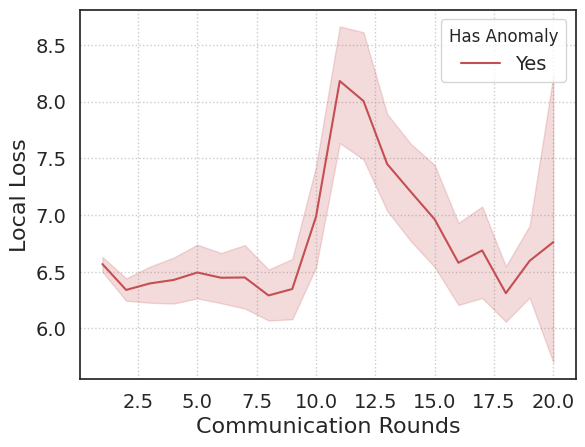

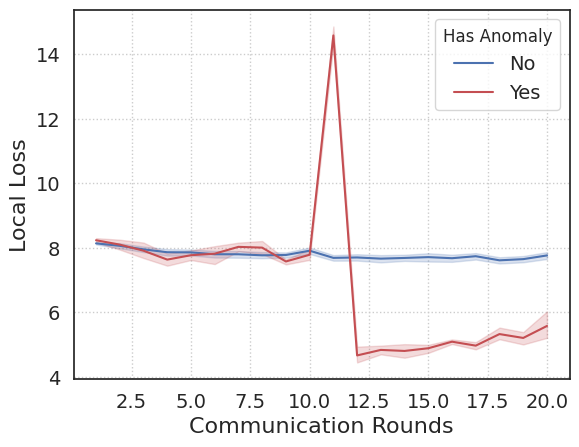

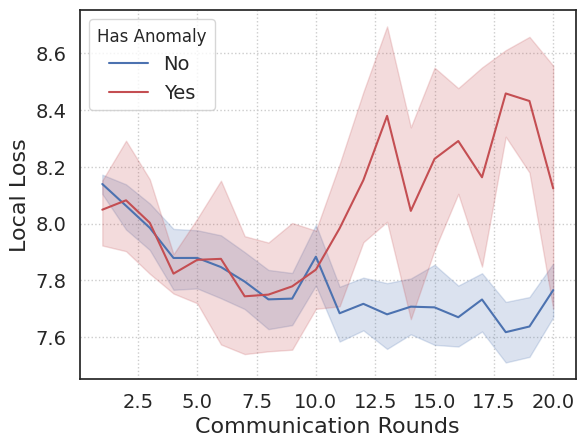

In [137]:
sns.set_theme(style='white')
palette ={'Yes':'r', 'No':'b'}

for i in range(3):
    
    sns.lineplot(datas[i], x = 'round', y = 'loss', hue='client_anom', palette=palette)
    plt.grid(True, linestyle = ':')
    plt.xlabel('Communication Rounds', size = 16)
    plt.ylabel('Local Loss', size = 16)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.legend(title = 'Has Anomaly', fontsize=14)
    plt.savefig(f'figures/loss{i}.png', dpi = 600, bbox_inches='tight')
    plt.show()

In [138]:
data = datas[0]
analise = {'client':[],
           'round':[]}

for c in range(30):
    d = []
    for r in range(1,21):
        rounds = list(range(min([1,r-2]),r+1))
        data_ate_o_momento = data[data['round'].isin(rounds)]

        diff_mean = data_ate_o_momento[data_ate_o_momento['cid']== c]['loss'].mean()

        try:
            atual_diff = data[(data['cid'] == c) & (data['round'] == r)]['loss'].values[0]
        except IndexError:
            #print('error', c, r)
            pass

        if atual_diff >=1.4*diff_mean:
            if r>3:
                analise['client'].append(c)
                analise['round'].append(r)

analise = pd.DataFrame(analise)
analise['t_anom'] = 0
analise['anom'] = 1
r = 11
for cid in list(range(0,30)):#[0,1,2,3,4,5]:
       
    try:
        idx = analise[(analise['client'] == cid) & (analise['round'].isin([9,10,11]))].index.values[0] 
        analise.at[idx, 't_anom']= 1
    except IndexError:
        pass


In [139]:
f1_score( analise['t_anom'],analise['anom'])

0.761904761904762

In [140]:
recall_score(analise['t_anom'], analise['anom'])

1.0

In [141]:
precision_score(analise['t_anom'], analise['anom'])

0.6153846153846154

In [142]:
data = datas[1]
analise = {'client':[],
           'round':[]}

for c in range(30):
    d = []
    for r in range(1,21):
        rounds = list(range(min([1,r-2]),r+1))
        data_ate_o_momento = data[data['round'].isin(rounds)]
        try:
            last_losses1 = data[(data['cid'] == c) & (data['round'] == r-1)]['loss'].values[0]
            last_losses2 = data[(data['cid'] == c) & (data['round'] == r-2)]['loss'].values[0]
            last_losses3 = data[(data['cid'] == c) & (data['round'] == r-3)]['loss'].values[0]
        except IndexError:
             last_losses1 = np.inf
             last_losses2 = np.inf

        diff_mean = data_ate_o_momento[data_ate_o_momento['cid']== c]['loss'].mean()

        try:
            atual_diff = data[(data['cid'] == c) & (data['round'] == r)]['loss'].values[0]
        except IndexError:
            #print('error', c, r)
            pass

        if atual_diff >1.5*diff_mean:
            if r>3:
                analise['client'].append(c)
                analise['round'].append(r)

analise = pd.DataFrame(analise)
analise['t_anom'] = 0
analise['anom'] = 1
r = 11
for cid in [0,1,2,3,4]:
       
    try:
        idx = analise[(analise['client'] == cid) & (analise['round'] == r)].index.values[0] 
        analise.at[idx, 't_anom']= 1
    except IndexError:
        pass


In [143]:
f1_score( analise['t_anom'],analise['anom'])

1.0

In [144]:
data = datas[2]
analise = {'client':[],
           'round':[]}

for c in range(30):
    d = []
    for r in range(1,21):
        rounds = list(range(min([1,r-2]),r+1))
        data_ate_o_momento = data[data['round'].isin(rounds)]
        try:
            last_losses1 = data[(data['cid'] == c) & (data['round'] == r-1)]['loss'].values[0]
            last_losses2 = data[(data['cid'] == c) & (data['round'] == r-2)]['loss'].values[0]
            last_losses3 = data[(data['cid'] == c) & (data['round'] == r-3)]['loss'].values[0]
            last_losses4 = data[(data['cid'] == c) & (data['round'] == r-4)]['loss'].values[0]
        except IndexError:
             last_losses1 = np.inf
             last_losses2 = np.inf

        diff_mean = data_ate_o_momento[data_ate_o_momento['cid']== c]['loss'].mean()

        try:
            atual_diff = data[(data['cid'] == c) & (data['round'] == r)]['loss'].values[0]
        except IndexError:
            #print('error', c, r)
            pass

        if atual_diff >last_losses1:
            if last_losses1 >last_losses2:
                if atual_diff >1.06*diff_mean:
                    if r>3:
                        analise['client'].append(c)
                        analise['round'].append(r)

analise = pd.DataFrame(analise)
analise['t_anom'] = 0
analise['anom'] = 1
r = 11
for cid in [0,1,2,3,4]:
       
    try:
        idx = analise[(analise['client'] == cid) & (analise['round'].isin([11,12,13]))].index.values[0] 
        analise.at[idx, 't_anom']= 1
    except IndexError:
        pass


In [145]:
f1_score( analise['t_anom'],analise['anom'])

0.6666666666666666

In [146]:
recall_score(analise['t_anom'], analise['anom'])

1.0

In [147]:
precision_score(analise['t_anom'], analise['anom'])

0.5

In [148]:
analise[analise['t_anom'] == 1]

,client,round,t_anom,anom
1,1,13,1,1
